In [548]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

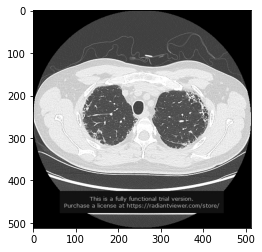

In [549]:
img=cv.imread("test/honeycombing/0100001.jpg")#转换成灰度图
origin=cv.imread("test/honeycombing/0100001.jpg")
img=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,cmap="gray")

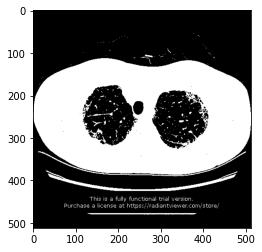

In [550]:
ret,thresh=cv.threshold(img,127,255,cv.THRESH_BINARY)
plt.imshow(thresh,cmap="gray")

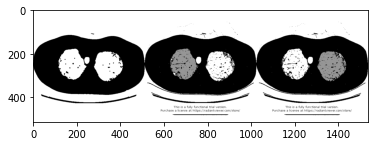

In [551]:
#闭运算
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,4))
closing=cv.morphologyEx(~thresh,cv.MORPH_CLOSE,kernel)#使用闭操作消除图像内部的小孔
mask=np.zeros([thresh.shape[0]+2,thresh.shape[1]+2],np.uint8)
fill1=~thresh.copy()
cv.floodFill(fill1,mask=mask,seedPoint=(180,200),newVal=150)
mask2=np.zeros([thresh.shape[0]+2,thresh.shape[1]+2],np.uint8)
fill2=~thresh.copy()
cv.floodFill(fill2,mask=mask,seedPoint=(300,200),newVal=150)
plt.imshow(np.hstack((closing,fill1,fill2)),cmap="gray")

In [552]:
print(thresh.shape)
test=np.zeros((512,512),np.uint8)
m=mask[1:mask.shape[0]-1,1:mask.shape[0]-1]+mask2[1:mask2.shape[0]-1,1:mask2.shape[0]-1]
for i in range(m.shape[0]):
    for j in range(m.shape[1]):
        if m[i,j]==1:
            test[i,j]=255
        else:
            test[i,j]=0
            

(512, 512)


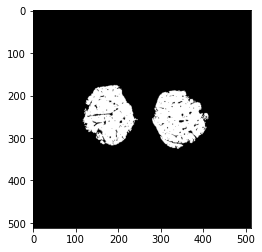

In [553]:
plt.imshow(test,cmap="gray")

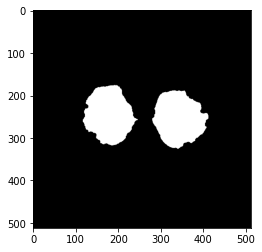

In [554]:
kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(11,11))
aaa=cv.morphologyEx(test,cv.MORPH_CLOSE,kernel)#使用闭操作消除图像内部的小孔
plt.imshow(aaa,cmap="gray")

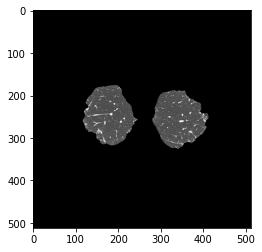

In [555]:
finalResult=np.zeros(img.shape,np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if aaa[i,j]==255:
            finalResult[i,j]=img[i,j]
        else:
            finalResult[i,j]=0
            
plt.imshow(cv.cvtColor(finalResult,cv.COLOR_BGR2RGB))

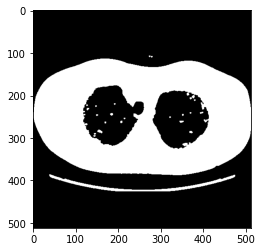

In [536]:
#取反
closing=~closing
plt.imshow(closing,cmap="gray")

In [537]:
contours, hierarchy = cv.findContours(closing,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [538]:
maxArea=0
maxContour=[]
index=0
for i in range(len(contours)):
    area = cv.contourArea(contours[i])
    if area>maxArea:
        maxArea=area
        maxContour=contours[i]



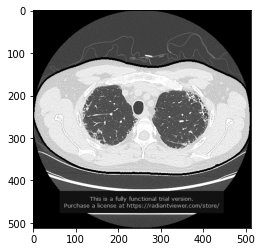

In [412]:
i=cv.drawContours(img, [maxContour], 0, (0,150,100), 3)
plt.imshow(i,cmap="gray")

In [413]:
#判断点是否在最大连通区域轮廓内,制作掩模
mask=closing.copy()
isIn=0
for i in range(closing.shape[0]):
    for j in range(closing.shape[1]):
        isIn=cv.pointPolygonTest(maxContour,(j,i),False)
        
        if isIn==1:
            mask[i,j]=0
        else:
            mask[i,j]=255

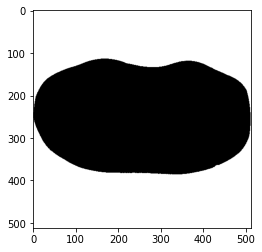

In [414]:
plt.imshow(mask,cmap="gray")

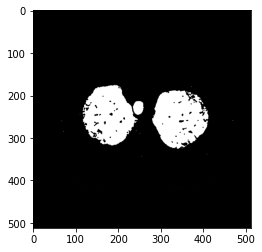

In [415]:
#取反
mask=~mask
result=mask-closing
plt.imshow(result,cmap="gray")

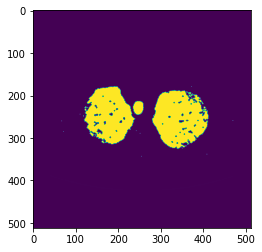

In [427]:
#去掉气管,去掉连通面积最小的
contours2, hierarchy2 = cv.findContours(result,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
minArea=1000
minContour=[]
index=0
a=[]
for i in range(len(contours2)):
    area = cv.contourArea(contours2[i])
    a.append(area)
    if area>1000:
        minArea=area
        minContour=contours2[i]
i2=cv.drawContours(result, [minContour], 0, (0,150,100), 3) #该函数会更改原图像
plt.imshow(i2,cmap="gray")

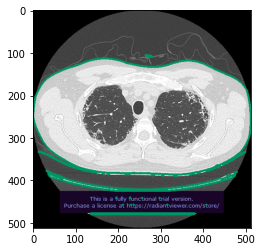

In [425]:
i2=cv.drawContours(origin, contours2, -1, (0,150,100), 3) #该函数会更改原图像
plt.imshow(i2,cmap="gray")

In [424]:
a

[501.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 6.0,
 2.0,
 4.0,
 6.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 2.0,
 2.0,
 2.0,
 4.0,
 7.0,
 2.0,
 2.0,
 2.0,
 2321.5,
 10.0,
 2.0,
 11.0,
 2.0,
 2.0,
 28.0,
 5.0,
 38.0,
 173.0,
 2.0,
 116188.0,
 40.0]